In [1]:
import json 

with open('data/extractions/contact_extraction3/train/raw/contact_cases.json', 'r') as f:
    train = json.load(f)
    
with open('data/extractions/contact_extraction3/val/raw/contact_cases.json', 'r') as f:
    val = json.load(f)

In [5]:
def ev_arr2hist(ev_arr, bins):
    return np.histogram2d(*np.array(ev_arr).T[:2], bins=bins)[0]

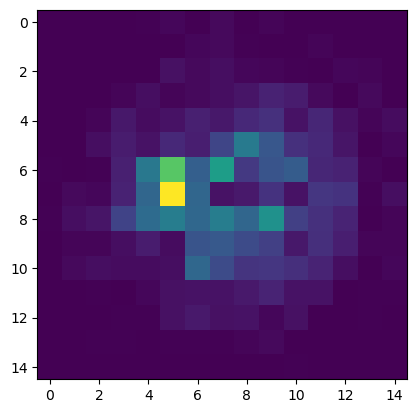

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.histogram2d(*np.array(samples['sample_100']['events']).T[:2], bins=15)[0])

In [11]:
15*15

225

In [97]:
import pandas as pd
bins = 40
df = pd.DataFrame({f'f{i}': [] for i in range(1,bins**2+1)})
df

val_df = pd.DataFrame({f'f{i}': [] for i in range(1,bins**2+1)})

In [98]:
for s_idx, sample in train.items():
    hist = ev_arr2hist(sample['events'], bins=bins).ravel()
    temp_df = pd.DataFrame({f'f{i}': [hist[i-1]] for i in range(1,bins**2+1)})
    df = df.append(temp_df)
    
for s_idx, sample in val.items():
    hist = ev_arr2hist(sample['events'], bins=bins).ravel()
    temp_df = pd.DataFrame({f'f{i}': [hist[i-1]] for i in range(1,bins**2+1)})
    val_df = val_df.append(temp_df)

/tmp/ipykernel_46298/2340147908.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/tmp/ipykernel_46298/2340147908.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/tmp/ipykernel_46298/2340147908.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/tmp/ipykernel_46298/2340147908.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/tmp/ipykernel_46298/2340147908.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/tmp/ipykernel_

In [99]:
final = df.iloc[:, (df.mean() >= 5).values]
final

,f421,f532,f533,f621,f624,f653,f654,f655,f656,f657,...,f1064,f1066,f1067,f1068,f1099,f1100,f1103,f1104,f1106,f1107
0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
0,8.0,12.0,18.0,6.0,9.0,30.0,15.0,5.0,3.0,4.0,...,9.0,7.0,8.0,12.0,4.0,3.0,4.0,5.0,3.0,10.0
0,4.0,4.0,25.0,6.0,6.0,0.0,4.0,0.0,10.0,10.0,...,2.0,10.0,20.0,5.0,4.0,0.0,15.0,11.0,18.0,21.0
0,9.0,2.0,13.0,15.0,3.0,20.0,0.0,2.0,3.0,9.0,...,7.0,13.0,19.0,9.0,29.0,40.0,10.0,5.0,12.0,19.0
0,4.0,0.0,4.0,4.0,2.0,13.0,8.0,1.0,3.0,4.0,...,3.0,6.0,2.0,3.0,3.0,4.0,1.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9.0,10.0,34.0,21.0,9.0,8.0,32.0,2.0,1.0,5.0,...,10.0,12.0,9.0,19.0,0.0,4.0,3.0,1.0,2.0,16.0
0,9.0,2.0,5.0,4.0,2.0,9.0,18.0,1.0,3.0,14.0,...,4.0,6.0,7.0,6.0,4.0,4.0,3.0,1.0,8.0,6.0
0,9.0,1.0,5.0,0.0,0.0,0.0,11.0,36.0,10.0,1.0,...,2.0,3.0,5.0,1.0,5.0,2.0,4.0,3.0,3.0,2.0
0,13.0,12.0,11.0,1.0,10.0,25.0,15.0,4.0,0.0,5.0,...,9.0,25.0,20.0,4.0,6.0,8.0,7.0,7.0,0.0,0.0


In [100]:
val_final = val_df.iloc[:, (df.mean() >= 5).values]
val_final

,f421,f532,f533,f621,f624,f653,f654,f655,f656,f657,...,f1064,f1066,f1067,f1068,f1099,f1100,f1103,f1104,f1106,f1107
0,0.0,4.0,4.0,1.0,0.0,6.0,7.0,6.0,2.0,6.0,...,2.0,0.0,1.0,4.0,0.0,2.0,0.0,3.0,4.0,0.0
0,6.0,11.0,7.0,4.0,1.0,11.0,10.0,3.0,3.0,2.0,...,5.0,7.0,11.0,2.0,6.0,5.0,6.0,9.0,2.0,5.0
0,10.0,16.0,20.0,25.0,10.0,11.0,20.0,6.0,1.0,3.0,...,8.0,6.0,11.0,8.0,2.0,5.0,10.0,1.0,1.0,0.0
0,10.0,15.0,1.0,20.0,26.0,19.0,5.0,26.0,24.0,6.0,...,8.0,23.0,7.0,4.0,5.0,9.0,9.0,15.0,18.0,1.0
0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3.0,3.0,10.0,30.0,5.0,12.0,10.0,2.0,15.0,12.0,...,7.0,6.0,10.0,1.0,2.0,3.0,8.0,11.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,1.0,1.0,0.0,...,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,2.0,4.0,9.0,2.0,7.0,2.0,3.0,9.0,4.0,...,2.0,7.0,3.0,5.0,2.0,1.0,8.0,1.0,6.0,7.0
0,4.0,0.0,0.0,16.0,15.0,7.0,10.0,2.0,5.0,8.0,...,3.0,29.0,56.0,24.0,4.0,1.0,3.0,3.0,23.0,37.0


In [101]:
import math
possible_angle = [math.radians(i) for i in range(1,11)]#[0.0174532925, 0.034906585, 0.0523598776, 0.075, 0.095, 0.115, 0.135, 0.15]#
N_examples = 20
list_of_rotations = [[0, 0, 0]]

for i in range(1, N_examples):
    theta = i * 2 * math.pi/(N_examples - 1)
    for phi in possible_angle:
        rx = phi * math.cos(theta)
        ry = phi * math.sin(theta)
        rotvec = [rx, ry, 0]
        list_of_rotations.append(rotvec)

print(len(list_of_rotations))
print(list_of_rotations)


cases_dict = {i+1: list_of_rotations[i][:2] for i in range(len(list_of_rotations))}
cases_dict[0] = [0, 0]

191
[[0, 0, 0], [0.016507624989807086, 0.00566707481709966, 0], [0.03301524997961417, 0.01133414963419932, 0], [0.04952287496942126, 0.017001224451298983, 0], [0.06603049995922834, 0.02266829926839864, 0], [0.08253812494903542, 0.0283353740854983, 0], [0.09904574993884252, 0.034002448902597966, 0], [0.1155533749286496, 0.03966952371969762, 0], [0.13206099991845668, 0.04533659853679728, 0], [0.14856862490826378, 0.05100367335389694, 0], [0.16507624989807085, 0.0566707481709966, 0], [0.013773100149832318, 0.01072003414404066, 0], [0.027546200299664637, 0.02144006828808132, 0], [0.04131930044949696, 0.03216010243212198, 0], [0.05509240059932927, 0.04288013657616264, 0], [0.06886550074916159, 0.053600170720203295, 0], [0.08263860089899391, 0.06432020486424396, 0], [0.09641170104882622, 0.07504023900828462, 0], [0.11018480119865855, 0.08576027315232528, 0], [0.12395790134849086, 0.09648030729636593, 0], [0.13773100149832318, 0.10720034144040659, 0], [0.009546046196954917, 0.0146113114330066

In [102]:
rot = np.array([cases_dict[sample['case']] for i, sample in train.items()])
rot_val = np.array([cases_dict[sample['case']] for i, sample in val.items()])

In [103]:
val_final['rot1'] = rot_val[:, 0]
val_final['rot2'] = rot_val[:, 1]

/tmp/ipykernel_46298/56496856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_final['rot1'] = rot_val[:, 0]
/tmp/ipykernel_46298/56496856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_final['rot2'] = rot_val[:, 1]


In [104]:
final

,f421,f532,f533,f621,f624,f653,f654,f655,f656,f657,...,f1064,f1066,f1067,f1068,f1099,f1100,f1103,f1104,f1106,f1107
0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
0,8.0,12.0,18.0,6.0,9.0,30.0,15.0,5.0,3.0,4.0,...,9.0,7.0,8.0,12.0,4.0,3.0,4.0,5.0,3.0,10.0
0,4.0,4.0,25.0,6.0,6.0,0.0,4.0,0.0,10.0,10.0,...,2.0,10.0,20.0,5.0,4.0,0.0,15.0,11.0,18.0,21.0
0,9.0,2.0,13.0,15.0,3.0,20.0,0.0,2.0,3.0,9.0,...,7.0,13.0,19.0,9.0,29.0,40.0,10.0,5.0,12.0,19.0
0,4.0,0.0,4.0,4.0,2.0,13.0,8.0,1.0,3.0,4.0,...,3.0,6.0,2.0,3.0,3.0,4.0,1.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9.0,10.0,34.0,21.0,9.0,8.0,32.0,2.0,1.0,5.0,...,10.0,12.0,9.0,19.0,0.0,4.0,3.0,1.0,2.0,16.0
0,9.0,2.0,5.0,4.0,2.0,9.0,18.0,1.0,3.0,14.0,...,4.0,6.0,7.0,6.0,4.0,4.0,3.0,1.0,8.0,6.0
0,9.0,1.0,5.0,0.0,0.0,0.0,11.0,36.0,10.0,1.0,...,2.0,3.0,5.0,1.0,5.0,2.0,4.0,3.0,3.0,2.0
0,13.0,12.0,11.0,1.0,10.0,25.0,15.0,4.0,0.0,5.0,...,9.0,25.0,20.0,4.0,6.0,8.0,7.0,7.0,0.0,0.0


In [105]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000, max_depth=3, n_jobs=8)
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=8, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
xgb.fit(X=final.values[:, :-2], y=final.values[:, -2:])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [107]:
final.values[:, -2:]

array([[ 0.,  0.],
       [ 3., 10.],
       [18., 21.],
       ...,
       [ 3.,  2.],
       [ 0.,  0.],
       [69., 17.]])

In [108]:
np.mean(np.linalg.norm(xgb.predict(val_final.values[:, :-2]) - val_final.values[:, -2:], axis=-1))*180/np.pi

ValueError: Feature shape mismatch, expected: 136, got 138